**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: José Eduardo De Moraes López
*   MATRÍCULA: A01634782


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [111]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
air_df = pd.read_csv('/content/drive/MyDrive/Maestría/DS/LaqnData.csv')
air_df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R
...,...,...,...,...,...,...
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R


In [112]:
#Estructura y contenido del dataframe
print("Tamaño del DataFrame:", air_df.shape)          #Tamaño del DataFrame
print("Columnas del DataFrame:", air_df.columns)    #Nombres de las columnas
print("Primeras 5 filas del DataFrame:\n", air_df.head())  #Primeras 5 filas
print("Últimas 5 filas del DataFrame:\n", air_df.tail())   #Últimas 5 filas
print("Tipos de datos:\n", air_df.dtypes)      #Tipos de datos

Tamaño del DataFrame: (43800, 6)
Columnas del DataFrame: Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')
Primeras 5 filas del DataFrame:
   Site Species   ReadingDateTime  Value   Units Provisional or Ratified
0  CT3      NO  01/01/2017 00:00    3.5  ug m-3                       R
1  CT3      NO  01/01/2017 01:00    3.6  ug m-3                       R
2  CT3      NO  01/01/2017 02:00    2.2  ug m-3                       R
3  CT3      NO  01/01/2017 03:00    2.1  ug m-3                       R
4  CT3      NO  01/01/2017 04:00    3.3  ug m-3                       R
Últimas 5 filas del DataFrame:
       Site Species   ReadingDateTime  Value   Units Provisional or Ratified
43795  CT3   PM2.5  31/12/2017 19:00   -2.0  ug m-3                       R
43796  CT3   PM2.5  31/12/2017 20:00    6.0  ug m-3                       R
43797  CT3   PM2.5  31/12/2017 21:00    5.0  ug m-3                       R
43798  CT3   PM2.5  31

In [113]:
#Porcentaje de valores faltantes por columna
porcentaje_faltante = air_df.isnull().mean() * 100
print("Porcentaje de valores faltantes por columna", porcentaje_faltante)

Porcentaje de valores faltantes por columna Site                       0.000000
Species                    0.000000
ReadingDateTime            0.000000
Value                      7.374429
Units                      0.000000
Provisional or Ratified    0.000000
dtype: float64


2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [114]:
#Cantidad de valores únicos por columna
unique_counts = air_df.nunique()
print("Cantidad de valores únicos por columna:\n", unique_counts)

Cantidad de valores únicos por columna:
 Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64


In [115]:
#Total de mediciones
mediciones = unique_counts['ReadingDateTime']  # Total de mediciones
print(f"¿Cuántas mediciones se hicieron? {mediciones}")

¿Cuántas mediciones se hicieron? 8760


In [116]:
#Contaminantes únicos analizados
contaminantes = unique_counts['Species']        # Total de contaminantes
print(f"¿Cuántos contaminantes del aire (Species) se analizaron? {contaminantes}")

¿Cuántos contaminantes del aire (Species) se analizaron? 5


In [117]:
#Identificar columnas que no agregan valor informativo
non_informative_columns = unique_counts[unique_counts <= 1].index.tolist()
print("Columnas no informativas:\n", non_informative_columns)

#Eliminar columnas no informativas del DataFrame
air_df = air_df.drop(columns=non_informative_columns)

Columnas no informativas:
 ['Site', 'Provisional or Ratified']


In [118]:
#Verificar la columna 'Units' y eliminarla
print("Valores únicos en 'Units':", air_df['Units'].unique())
air_df = air_df.drop(columns=['Units'])

Valores únicos en 'Units': ['ug m-3' 'ug m-3 as NO2' 'ug/m3']


In [119]:
#Mostrar el DataFrame resultante
print("Head de DataFrame después de eliminar columnas no informativas:\n", air_df.head())

Head de DataFrame después de eliminar columnas no informativas:
   Species   ReadingDateTime  Value
0      NO  01/01/2017 00:00    3.5
1      NO  01/01/2017 01:00    3.6
2      NO  01/01/2017 02:00    2.2
3      NO  01/01/2017 03:00    2.1
4      NO  01/01/2017 04:00    3.3


3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [120]:
#Contar valores por categoría en la columna 'Species'
species_counts = air_df['Species'].value_counts()
print("Conteo de valores por categoría en 'Species':\n", species_counts)

#Total de mediciones
total_mediciones = air_df['ReadingDateTime'].nunique()
print(f"Total de mediciones: {total_mediciones}")

#Verificar si la suma de las lecturas por contaminante coincide con el total de mediciones
#Se puede hacer sumando los valores de species_counts
total_species_readings = species_counts.sum()

print(f"Suma de lecturas por contaminante: {total_species_readings}")

if total_species_readings == total_mediciones:
    print("Las lecturas de cada contaminante coinciden con el total de mediciones.")
else:
    print("Las lecturas de cada contaminante NO coinciden con el total de mediciones.")

Conteo de valores por categoría en 'Species':
 Species
NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: count, dtype: int64
Total de mediciones: 8760
Suma de lecturas por contaminante: 43800
Las lecturas de cada contaminante NO coinciden con el total de mediciones.


43800 son el total de todas las lecturas, no el total de momentos de tiempo únicos. Por lo que las lecturas de cada contaminante NO coinciden con el total de mediciones.

4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [121]:
#Calcular el promedio del valor por contaminante
promedio_por_contaminante = air_df.groupby('Species')['Value'].mean()

#Mostrar el resultado
print("Promedio del valor por contaminante:\n", promedio_por_contaminante)

Promedio del valor por contaminante:
 Species
NO       15.045115
NO2      38.010185
NOX      61.078661
PM10     22.551704
PM2.5    14.999831
Name: Value, dtype: float64


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [122]:
#Cambiar el formato de largo a ancho
pvt_df = air_df.pivot_table(index='ReadingDateTime', columns='Species', values='Value', aggfunc='mean')

#Reiniciar el índice para que 'ReadingDateTime' vuelva a ser una columna
pvt_df.reset_index(inplace=True)

#Mostrar el DataFrame resultante
print("DataFrame en formato ancho (pvt_df):\n", pvt_df.head())

DataFrame en formato ancho (pvt_df):
 Species   ReadingDateTime   NO   NO2   NOX  PM10  PM2.5
0        01/01/2017 00:00  3.5  30.8  36.2  35.7    NaN
1        01/01/2017 01:00  3.6  31.5  37.0  28.5    NaN
2        01/01/2017 02:00  2.2  27.3  30.7  22.7    NaN
3        01/01/2017 03:00  2.1  23.5  26.8  20.5    NaN
4        01/01/2017 04:00  3.3  28.0  33.0  22.1    NaN


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [123]:
#Usar describe() para obtener estadísticas descriptivas
stats = pvt_df.describe()
print(stats)

Species           NO          NO2          NOX         PM10        PM2.5
count    8660.000000  8660.000000  8660.000000  8657.000000  5933.000000
mean       15.045115    38.010185    61.078661    22.551704    14.999831
std        26.678565    18.580841    54.584805    15.344755    13.558588
min        -2.000000     2.800000     1.000000    -5.600000    -8.000000
25%         3.100000    23.800000    30.300000    13.900000     7.000000
50%         7.100000    35.300000    46.900000    19.500000    11.000000
75%        15.500000    49.900000    73.800000    27.300000    18.000000
max       401.799990   120.200000   734.299990   633.099980   128.000000


In [124]:
#Obtener el mayor valor de NO2 y el día correspondiente
max_no2 = pvt_df['NO2'].max()
max_no2_day = pvt_df.loc[pvt_df['NO2'] == max_no2, 'ReadingDateTime'].values[0]
print(f"El mayor valor de NO2 registrado: {max_no2}, pertenece al día: {max_no2_day}")

El mayor valor de NO2 registrado: 120.2, pertenece al día: 24/01/2017 19:00


In [125]:
#Obtener el menor valor de PM10 y el día correspondiente
min_pm10 = pvt_df['PM10'].min()
min_pm10_day = pvt_df.loc[pvt_df['PM10'] == min_pm10, 'ReadingDateTime'].values[0]
print(f"El menor valor de PM10 registrado: {min_pm10}, pertenece al día: {min_pm10_day}")

El menor valor de PM10 registrado: -5.6, pertenece al día: 12/09/2017 23:00


In [126]:
#Obtener la mediana de NO
median_no = pvt_df['NO'].median()
print(f"La mediana del NO es: {median_no}. Esto significa que el 50% de las mediciones de NO son menores o iguales a este valor.")

La mediana del NO es: 7.1. Esto significa que el 50% de las mediciones de NO son menores o iguales a este valor.


In [127]:
#Obtener el primer cuartil de PM2.5
first_quartile_pm25 = pvt_df['PM2.5'].quantile(0.25)
print(f"El primer cuartil de PM2.5 es: {first_quartile_pm25}.")

El primer cuartil de PM2.5 es: 7.0.


 Esto significa que el 25% de las mediciones de PM2.5 son menores o iguales a este valor.

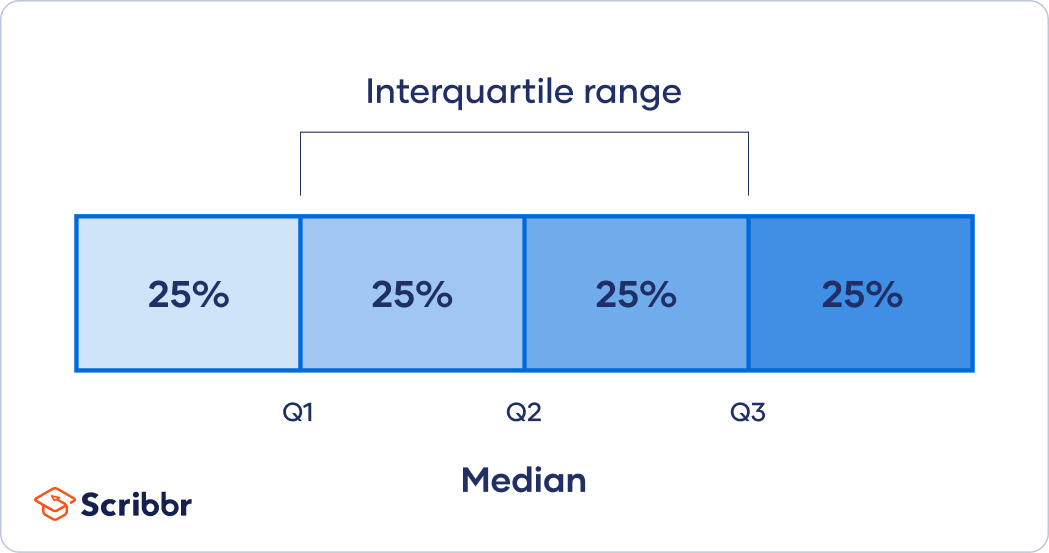

7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

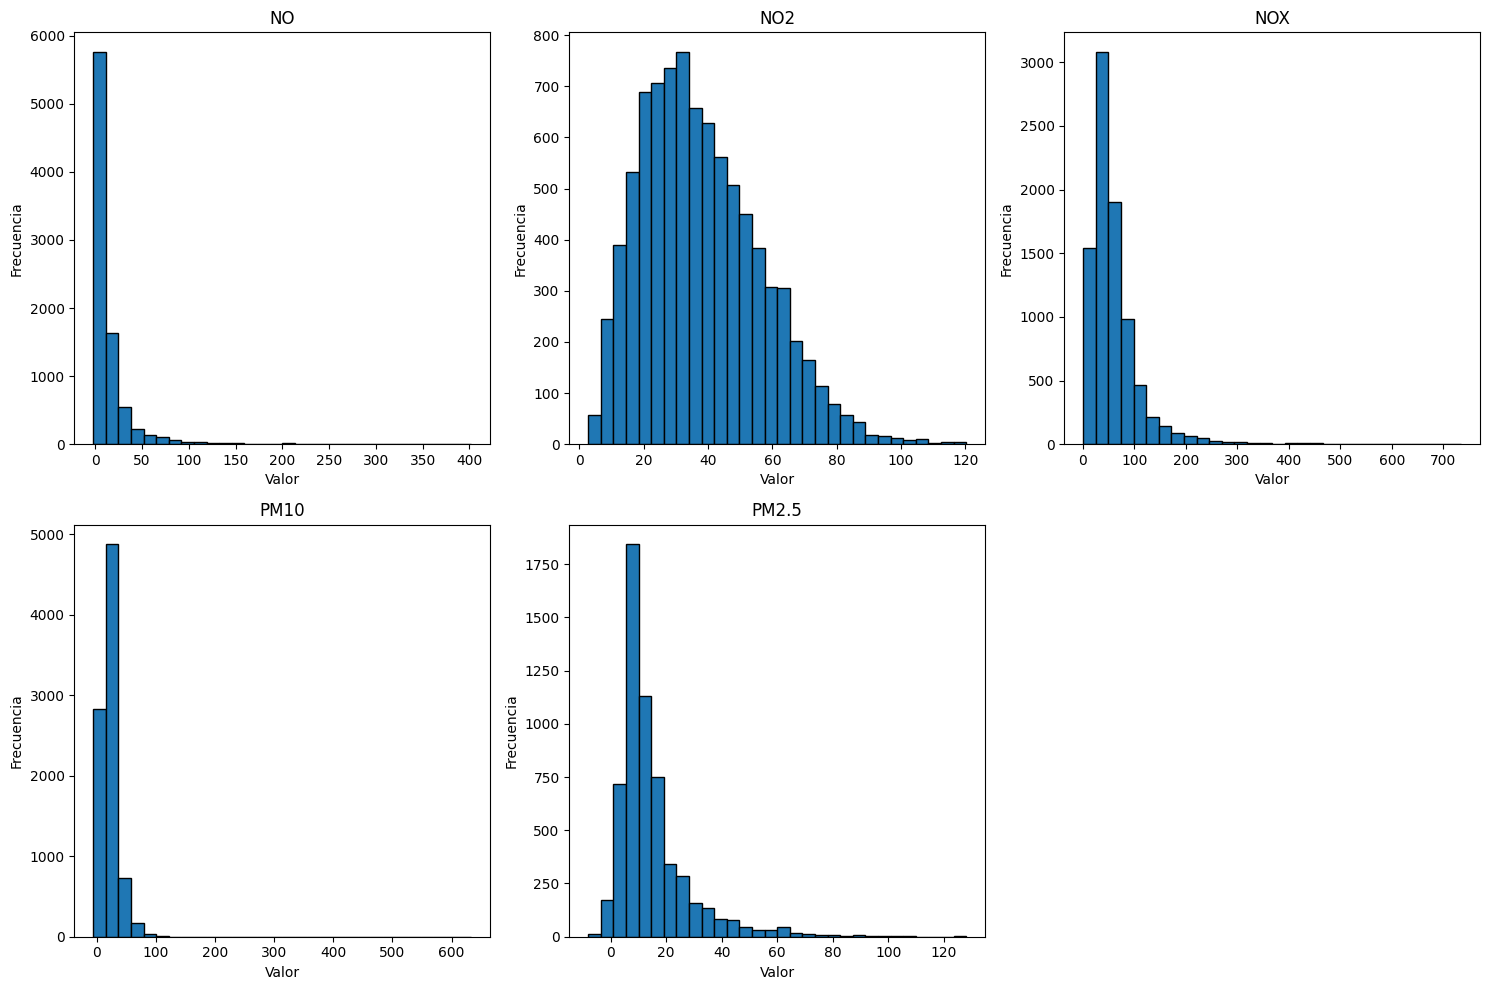

Desviaciones estándar de cada contaminante:

Species
NO       26.678565
NO2      18.580841
NOX      54.584805
PM10     15.344755
PM2.5    13.558588
dtype: float64
El contaminante con mayor variabilidad es: NOX con una desviación estándar de: 54.584805082983586


In [128]:
#Configuración de la figura para los histogramas
plt.figure(figsize=(15, 10))

#Filtrar solo columnas numéricas
numeric_columns = pvt_df.select_dtypes(include=['float64', 'int64']).columns

#Dibujar histogramas para cada columna numérica de pvt_df
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(2, 3, i)  # Ajustar el número de filas y columnas según sea necesario
    pvt_df[column].plot.hist(bins=30, edgecolor='black')  #Usar plot.hist()
    plt.title(column)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#Calcular la variabilidad (desviación estándar) de cada contaminante
variabilidad = pvt_df[numeric_columns].std()
max_variabilidad = variabilidad.idxmax()
max_variabilidad_value = variabilidad.max()

#Calcular la desviación estándar de cada columna numérica en pvt_df
variabilidad = pvt_df.select_dtypes(include=['float64', 'int64']).std()

#Mostrar las desviaciones estándar
print("Desviaciones estándar de cada contaminante:\n")
print(variabilidad)
print(f"El contaminante con mayor variabilidad es: {max_variabilidad} con una desviación estándar de: {max_variabilidad_value}")

Es muy importante ver las escalas que tiene cada histograma y utilizar la desviación estandar como principal atributo para identificar una mayor variación.

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [129]:
#Separar la columna ReadingDateTime en Date y Time
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)  #Divide en dos columnas
datetime_df.columns = ['Date','Time'] #Asigna nombres a las columnas
datetime_df
#Separar la fecha en Day, Month y Year
date_df = datetime_df.Date.str.split('/',expand=True) #Divide la columna Date en Day, Month y Year
date_df.columns = ['Day','Month','Year'] #Asignar nombre a las columnas
date_df
#Unir las nuevas columnas al DataFrame original y eliminar columnas innecesarias
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year']) #Une el DataFrame con la nueva información de fecha y tambien elimina las columnas innecesarias
air_df = air_df.set_index(['Month','Day','Time','Species']) #Establece un índice multinivel
air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [130]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

Ambos metodos  reorganizan los datos de manera comparable y pueden llegar a tener un formato similar en su representación final pero las salidas no son estrictamente iguales, contienen exactamente el mismo contenido pero hay un cambio con las dimensiones de la matriz del dataset, podemos ver como una es de 43800 filas y otro de 8760, esto es importante ya que dependiendo de que información se quiera extraer o utilizar la localización de los datos cambia.

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

Ambos están diseñados para cambiar el formato de los datos entre largo y ancho, pero llevan a cabo la función contraria al otro.

melt() convierte un DataFrame del formato ancho al formato largo. Resulta en un DataFrame más vertical, donde las columnas se convierten en filas.

pivot() hace el proceso inverso: convierte un DataFrame del formato largo al ancho. Reorganiza los datos usando valores de una columna como encabezados de nuevas columnas.




Ambos están orientados a trabajar con MultiIndex y niveles de índice en el DataFrame, cambiando la estructura entre columnas y filas. Es basicamente el mismo concepto que melt y pivot.

stack() convierte un DataFrame ancho a largo agrupando múltiples columnas en niveles de índice adicionales (MultiIndex) y transformando los nombres de las columnas en filas.

unstack() convierte un DataFrame del formato largo a ancho, moviendo los niveles del índice hacia las columnas. Es el inverso de stack().


Para elegir una contraparte para melt() entre stack()/unstack() solo hay que razonar un poco en las definiciones pasadas, melt generá el dataframe vertical, generando muchas iteraciones de nuevas filas, en el caso de stack()/unstack() stack() es el que es más similar ya que ambos trabajan en la conversión hacia un formato más largo o vertical, teniendo una mayo cantidad de filas.